## Random Forest Regression

### Ensemble Learning
An Ensemble method is a technique that combines the predictions from multiple machine learning algorithms together to make more accurate predictions than any individual model. A model comprised of many models is called an Ensemble model.

<img src="https://d2ueix13hy5h3i.cloudfront.net/wp-content/uploads/2019/02/ensemble-learning.png">

### Types of Ensemble Learning
- Boosting.
- Bootstrap Aggregation (Bagging).

#### 1. Boosting
Boosting refers to a group of algorithms that utilize weighted averages to make weak learners into stronger learners. Boosting is all about `teamwork`. Each model that runs, dictates what features the next model will focus on.
In boosting as the name suggests, one is learning from other which in turn boosts the learning.

#### 2. Bootstrap Aggregation (Bagging)
Bootstrap refers to random sampling with replacement. Bootstrap allows us to better understand the bias and the variance with the dataset. Bootstrap involves random sampling of small subset of data from the dataset.
It is a general procedure that can be used to reduce the variance for those algorithm that have high variance, typically decision trees. Bagging makes each model run independently and then aggregates the outputs at the end without preference to any model.


**Problems with Decision Trees**
Decision trees are sensitive to the specific data on which they are trained. If the training data is changed the resulting decision tree can be quite different and in turn the predictions can be quite different.
Also Decision trees are computationally expensive to train, carry a big risk of overfitting, and tend to find local optima because they can’t go back after they have made a split.
To address these weaknesses, we turn to Random Forest, which illustrates the power of combining many decision trees into one model.

#### Random Forest

Random forest is a Supervised Learning algorithm which uses ensemble learning method for `classification` and `regression`.
Random forest is a bagging technique and not a boosting technique. The trees in random forests are run in parallel. There is no interaction between trees while building the trees.
It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

A random forest is a meta-estimator (i.e. it combines the result of multiple predictions) which aggregates many decision trees, with some helpful modifications:
The number of features that can be split on at each node is limited to some percentage of the total (which is known as the hyperparameter). This ensures that the ensemble model does not rely too heavily on any individual feature, and makes fair use of all potentially predictive features.
Each tree draws a random sample from the original data set when generating its splits, adding a further element of randomness that prevents overfitting.
The above modifications help prevent the trees from being too highly correlated.

<img src="https://c.mql5.com/2/33/image1__1.png">


- **STEP 1** : We only pick random K data points from Training set.
- **STEP 2** : We build a Decision Tree associated to these K data points rather than building a decision tree based on everything in dataset, so we just build a decision tree based on those data points that just like a subset of our dataset.
- **STEP 3** : We choose the number of Ntrees that we want to build and  repeat steps 1 & 2.
- **STEP 4** : Finally for a new data point, make each one of our Ntrees predict the value of Y to for the data point in question, and assign the new data point the average across all of the predicted Y values.

### Feature and Advantages of Random Forest :
- It is one of the most accurate learning algorithms available. For many data sets, it produces a highly accurate classifier and for more than one independent variable in regressions.
- It runs efficiently on large databases.
- It can handle thousands of input variables without variable deletion.
- It gives estimates of what variables that are important in the classification.
- It generates an internal unbiased estimate of the generalization error as the forest building progresses.
- It has an effective method for estimating missing data and maintains accuracy when a large proportion of the data are missing.
### Disadvantages of Random Forest :
- Random forests have been observed to overfit for some datasets with noisy classification/regression tasks.
- For data including categorical variables with different number of levels, random forests are biased in favor of those attributes with more levels. Therefore, the variable importance scores from random forest are not reliable for this type of data.


for more information you can check out [scikitlearn website](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) and [Wikipedia page](https://en.wikipedia.org/wiki/Random_forest)

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


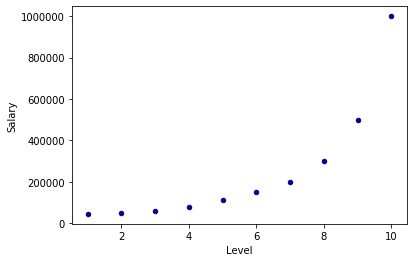

In [3]:
ax1 = dataset.plot.scatter(x='Level',
                      y='Salary',
                      c='DarkBlue')

In [4]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [5]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [6]:
# Predicting a new result
y_pred = regressor.predict(np.array([[6.5]]))

In [8]:
y_pred

array([160333.33333333])

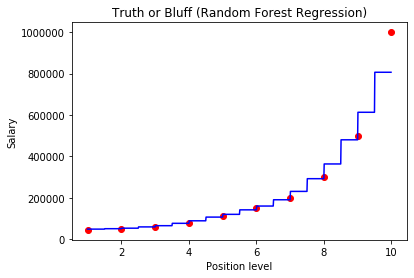

In [7]:
# Visualising the Random Forest Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()